In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import clique

In [2]:
df = pd.read_csv('C:/Users/Rik/Documents/Radboud Universiteit/CCMLWI/wg5/wg6-network analysis/sociogram-employees-un.csv', header = None)

In [3]:
g = nx.Graph(df)

In [4]:
pos = nx.spring_layout(g, scale = 10)

In [5]:
labels={}
labels[0]='A'
labels[1]='B'
labels[2]='C'
labels[3]='D'
labels[4]='E'
labels[5]='F'
labels[6]='G'
labels[7]='H'
labels[8]='I'
labels[9]='J'
labels[10]='K'
labels[11]='L'
labels[12]='M'
labels[13]='N'
labels[14]='O'
labels[15]='P'
labels[16]='Q'
labels[17]='R'
labels[18]='S'
labels[19]='T'
labels[20]='U'
labels[21]='V'
labels[22]='W'
labels[23]='X'
labels[24]='Y'

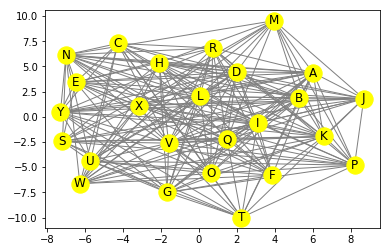

In [6]:
nx.draw_networkx(g, pos, with_labels = True, node_color = 'yellow', edge_color = 'grey', labels = labels)

In [7]:
def cliqueToLabels(clique):
    vertices = []
    for el in clique:
        vertices.append(labels[el])
    return vertices

In [8]:
def total_count(dict):
    total = 0
    for el in range(len(dict)):
        total += dict[el]
    return total

In [25]:
def betweenness_cluster(btws):
    minval = min(btws)
    maxval = max(btws)
    print(minval, maxval)    

Biggest clique: ['D', 'A', 'K', 'V', 'I', 'Q', 'B', 'J', 'H', 'X']
Total number of cliques: 128
Network cohesion: 13
dict_items([(0, 0.017803519417969548), (1, 0.014356458226343138), (2, 0.007998791134980397), (3, 0.02059498117682261), (4, 0.012349286653954173), (5, 0.005858977446253661), (6, 0.013208838736332345), (7, 0.01036134404101156), (8, 0.020507919013353793), (9, 0.0093459996832759), (10, 0.016976523346408257), (11, 0.01919723292005901), (12, 0.004797577623664581), (13, 0.016777547603954255), (14, 0.013506235109495977), (15, 0.011297761689385732), (16, 0.018915062393323266), (17, 0.008258987862568424), (18, 0.009183193014714755), (19, 0.007308296574600921), (20, 0.01606241129099185), (21, 0.022329081416357636), (22, 0.006465717726906985), (23, 0.01215092777592778), (24, 0.010474284643082594)])
24 0
Number of components in G: 1
Loop edge(s):  [(0, 1), (1, 3), (3, 0)]
Total number of triangles: 2421
Number of triangles with vertex S: 63
Global clustering coeficcient for g: 0.7185

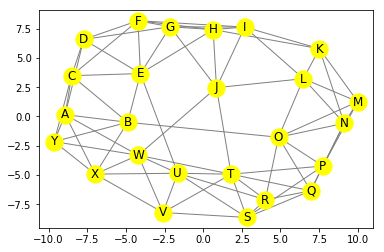

In [26]:
all_cliques = list(nx.find_cliques(g))
# print(all_cliques)
lens = []
for c in all_cliques:
    lens.append(len(c))
index_of_max = lens.index(max(lens))
#2.11
print("Biggest clique:", cliqueToLabels(all_cliques[index_of_max]))
#2.12
print("Total number of cliques:",len(all_cliques))
#2.13
print("Network cohesion:", nx.node_connectivity(g))
#2.14
btws = nx.betweenness_centrality(g).items()
print(btws)
betweenness_cluster(btw)
#2.15: #There is only one connected component, which means it's just the entire graph
print("Number of components in G:", nx.number_connected_components(g))
#2.16: #Only one cycle (loop edge) is found.
print("Loop edge(s): ", nx.find_cycle(g))
#2.17
print("Total number of triangles:", total_count(nx.triangles(g)))
print("Number of triangles with vertex S:", nx.triangles(g, 18))
#2.18: Clustering does not seem to be statistically significant at first glance
print("Global clustering coeficcient for g:", nx.average_clustering(g))
g_rand = nx.gnm_random_graph(g.number_of_nodes(), g.number_of_edges())
print("Global clustering coeficcient for random graph:", nx.average_clustering(g_rand))
#2.19: Small world graph with 25 nodes and 7 nearest neighbors
g_small_world = nx.watts_strogatz_graph(g.number_of_nodes(), g.number_of_nodes()-18, 0.08)
pos_sm = nx.spring_layout(g_small_world, scale = 10)
nx.draw_networkx(g_small_world, pos_sm, with_labels = True, node_color = 'yellow', edge_color = 'grey', labels = labels)